# Building a Neural Network from scratch

In [3]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
#!pip install mnist
import mnist
%matplotlib inline
plt.style.use('default')

# load data
train_images = mnist.train_images()
train_labels = mnist.train_labels()
num_train_images = len(train_labels)
test_images = mnist.test_images()
test_labels = mnist.test_labels()
num_test_images = len(test_images)

# print the data dimensions
print("Train Images Shape: "+str(train_images.shape))
print("Train Labels Shape: "+str(train_labels.shape))
print('Train Images DataType: '+str(train_images.dtype))
print("Test Images Shape: "+str(test_images.shape))
print("Test Labels Shape: "+str(test_labels.shape))
print('Test Images DataType: '+str(test_images.dtype))

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Train Images DataType: uint8
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)
Test Images DataType: uint8


Examine the data:

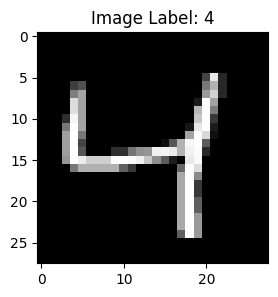

In [4]:
# display a single sample
idx = 2
plt.figure(figsize=(3,3))
plt.imshow(train_images[idx,:,:], cmap='gray')
plt.title("Image Label: "+str(train_labels[idx]));

Here is a diagram of the neural network we will build:

<img src="Network_Diagram.png" width="800">

# Build the components of the network:

The ReLU function in
\begin{equation}
ReLU(x) = 
\begin{cases} 
      0 & \textrm{if} & x < 0 \\
      x & \textrm{if} & x > 0 
\end{cases}
\end{equation}

The derivative is 
\begin{equation}
\frac{\textrm{d}ReLU(x)}{\textrm{dx}} = 
\begin{cases} 
      0 & \textrm{if} & x < 0 \\
      1 & \textrm{if} & x > 0 
\end{cases}
\end{equation}

In [5]:
# define the nonlinear ReLU function
def ReLU(x):
  return np.max((0,x))

The softmax function is
\begin{equation}
\sigma(x)=(\sigma_1(x),\sigma_2(x),...,\sigma_m(x)), \textrm{ where } \sigma_i(x)=\frac{e^{x_i}}{\sum_j e^{x_j}}.
\end{equation}
Note that the components sum to 1, so this is a probability distribution.

Observe that for $i\neq j$:
\begin{equation}
\frac{d \sigma_j(x)}{d x_i} = -\sigma_j(x)\sigma_i(x)
\end{equation}
and 
\begin{equation}
\frac{d \sigma_j(x)}{d x_j} = \sigma_j(x) - \sigma_j(x)^2
\end{equation}

In [6]:
# define the softmax function.  
# This converts a vector of K real numbers into a probability distribution of K possible outcomes. 
# It is a generalization of the logistic function to multiple dimensions, and used in multinomial logistic regression.
def softmax(inputs):
  outputs = np.exp(inputs)/np.sum(np.exp(inputs))
  return outputs

In [7]:
softmax(np.array([-1, 3, 12, -4]))

array([2.26004513e-06, 1.23394283e-04, 9.99874233e-01, 1.12521022e-07])

Now we can put these pieces together to make a layer in the form of a Python class.

In [67]:
# define a layer class
class FClayer:
  
  def __init__(self, numInputs, numNodes):
    self.numInputs = numInputs
    self.numNodes = numNodes
    self.weights = np.random.normal(0.0, 0.05, size=(numNodes, numInputs))
    self.biases = np.zeros(numNodes)

  def apply(self, inputs):
    if (len(inputs) != self.numInputs):
      # check here so if there is an error we get told nicely about it.
      print("WARNING: Inputs to layer wrong size for the layer.")
      output = np.zeros(self.numNodes)
      return output
    # create a vector to hour the output of the layer
    output = np.zeros(self.numNodes)
    # Apply weights and baises
    x = np.matmul(self.weights, inputs) + self.biases
    # Apply the nonlinear function to each node
    for i in range(self.numNodes):
      output[i] = ReLU(x[i])
    return output

In [68]:
layer = FClayer(5,3)

In [69]:
layer.weights

array([[-0.05917611, -0.01714524,  0.12856159, -0.00510295, -0.00252569],
       [-0.05889656,  0.05097658, -0.00307812,  0.07098581,  0.0528231 ],
       [-0.02424139, -0.07059355,  0.0120963 ,  0.0023009 , -0.01953431]])

In [70]:
28*28

784

# Build the network:

In [71]:
# define two hidden layers and an output layer
layer1 = FClayer(28*28,30)
layer2 = FClayer(30,10)
layerFinal = softmax

In [72]:
# define the network
class network2layers():
  
  def __init__(self, layer1, layer2, layerFinal):
    self.layer1 = layer1
    self.layer2 = layer2
    self.layerFinal = layerFinal
  
  def apply(self, inputs):
    self.inputs = inputs
    # This determines the network 'architecture'
    self.out1 = self.layer1.apply(self.inputs)
    self.out2 = self.layer2.apply(self.out1)
    self.outFinal = self.layerFinal(self.out2)
    return self.outFinal

  def train(self, obs, y, alpha):
    # this is a placeholder method that we will modify later.
    # for now we just set the parameters equal to themselves instead of updating them
    #   obs = one observation (input into the network)
    #   y = the truth value for the obs
    #   alpha = the training rate
    self.layer1.weights = self.layer1.weights
    self.layer1.biases = self.layer1.biases
    self.layer2.weights = self.layer2.weights
    self.layer2.biases = self.layer2.biases

# create an instance of this network 
# (the weights will be randomly selected since it is not trained)
network = network2layers(layer1, layer2, layerFinal)

# Examine the network:

[[0, 255, 0], [0, 100, 0], [0, 0, 0]]


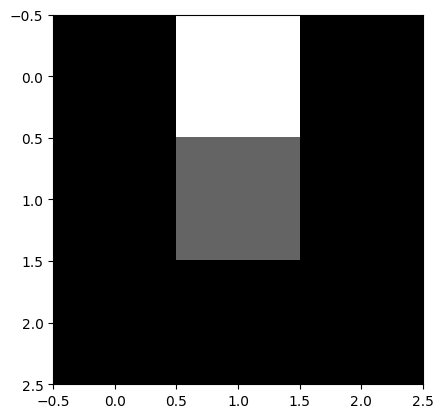

In [102]:
im = [[0,255,0],[0,100,0],[0,0,0]]
plt.imshow(im, cmap='gray')
print(im)

In [73]:
# look at the output of each layer for a test image
idx = 0 # (use the fisrt image/observation)
out1 = network.layer1.apply(train_images[idx,:,:].flatten()/255.)
print("Layer 1 output: "+str(out1))
out2 = network.layer2.apply(out1)
print("Layer 2 output: "+str(out2))
outFinal = network.layerFinal(out2)
print("Final layer output: "+str(outFinal))

Layer 1 output: [0.02663034 0.         0.37807752 0.         0.         0.
 0.11581831 0.6752647  0.         0.         0.75762956 0.23508814
 0.10867988 0.31885687 0.         0.73525326 0.42020651 0.53749987
 0.         0.04365933 0.41552926 0.         0.         0.
 0.         0.         0.         0.         0.36337452 0.        ]
Layer 2 output: [0.05540075 0.06045256 0.01959688 0.04502108 0.00185424 0.07657884
 0.         0.         0.         0.        ]
Final layer output: [0.10295207 0.10347348 0.0993312  0.10188899 0.09758434 0.10515565
 0.09740357 0.09740357 0.09740357 0.09740357]


In [74]:
# view the output of the network applied to a single image
# (this is the same as the output from the final layer above)
network.apply(train_images[2,:,:].flatten()/255.)

array([0.10270981, 0.09847543, 0.10144834, 0.09682814, 0.09682814,
       0.11090577, 0.10231994, 0.09682814, 0.09682814, 0.09682814])

In [75]:
# can get individual layer outputs from the network (since we saved them withing the network class in the apply method)
print("Layer 1 output: "+str(network.out1))
print("Layer 2 output: "+str(network.out2))
print("Final layer output: "+str(network.outFinal))

Layer 1 output: [0.         0.         0.66816121 0.         0.         0.
 0.         0.26988064 0.         0.         0.26492971 0.41841747
 1.15564466 0.59125629 0.75782984 0.04236147 0.         0.
 0.48745346 0.         0.         0.         0.22077974 0.14474731
 0.         0.         0.         0.         0.29540909 0.        ]
Layer 2 output: [0.05896996 0.01686939 0.04661205 0.         0.         0.13574322
 0.05516685 0.         0.         0.        ]
Final layer output: [0.10270981 0.09847543 0.10144834 0.09682814 0.09682814 0.11090577
 0.10231994 0.09682814 0.09682814 0.09682814]


The weights are hard to interpret by just looking at the numbers, so we can show them as images to get some intuition.  Since this is a network for learning images, the weights formattes as an image for each node can be insightful. (NOTE:  This is just noise since these are random untrained weights, but they should be more meaningful after training.)

In [76]:
math.isqrt(10)**2

9

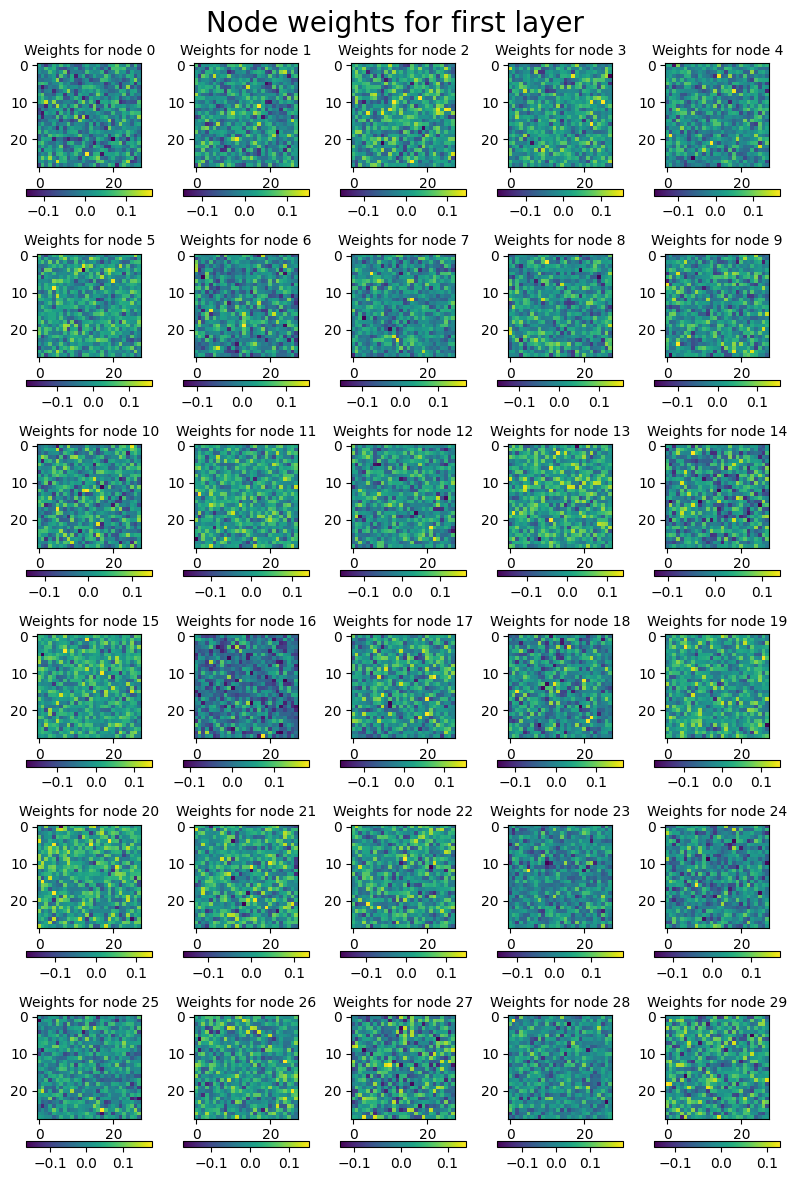

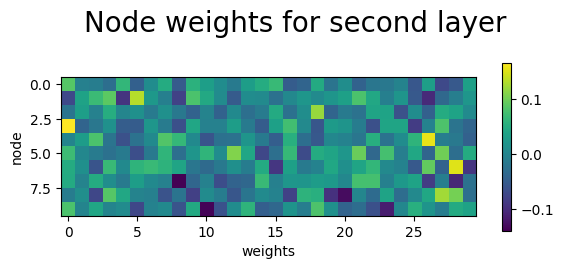

In [77]:
def NNview(layer, **kwargs):
    titleTxt = kwargs['title']
    numIn = layer.numInputs
    numNodes = layer.numNodes
    numRows = int(np.ceil(numNodes/5)) # number of rows of images
    if (numIn == math.isqrt(numIn)**2):
      plt.figure(figsize=(8,int(2*numRows)))
      plt.suptitle(titleTxt, fontsize=20)     
      for i in range(numNodes):
        plt.subplot(numRows,5,i+1) 
        imSide = int(np.sqrt(numIn))
        plt.imshow(np.reshape(layer.weights[i,:],(imSide,imSide)))
        plt.title('Weights for node '+str(i), fontsize=10)
        plt.colorbar(orientation='horizontal')
        plt.tight_layout()
    else:
      plt.figure(figsize=(6,2.5))
      plt.suptitle(titleTxt, fontsize=20)    
      plt.imshow(layer.weights)
      plt.xlabel('weights')
      plt.ylabel('node')
      plt.colorbar(orientation='vertical')
    plt.tight_layout()
    

NNview(network.layer1, title='Node weights for first layer')
NNview(network.layer2, title='Node weights for second layer')

# Training

To measure accuracy we will compare the output of the network, $\hat{y}$, on an image to the true label for the image, $y$.  We will use an accuracy measure called cross entropy.

The **cross entropy** loss function is
\begin{equation}
L(y,\hat{y}) = -\sum_i^m y_i \log(\hat{y}_i) = -(y_1 \log(\hat{y}_1) + y_2 \log(\hat{y}_2) + \cdots y_m \log(\hat{y}_m) )
\end{equation}
where $y=(y_1,y_2,...,y_m)$ is the true value and $\hat{y} = (\hat{y}_1,\hat{y}_2,...,\hat{y}_m)$ is the predicted value.

For example, if the image is of a number 5, $y=(0,0,0,0,0,1,0,0,0,0)$ and $L(y,\hat{y})=-\log(\hat{y}_5)$.  In general, for an image of a number $k$, $L(y,\hat{y})=-\log(\hat{y}_k)$.

In [78]:
# define our cross entropy loss function
def Loss(y,yHat):
  L = 0
  m = len(y)
  for i in range(m):
    # modify yHat[i] so we don't get log of zero (undefined).
    yHat[i] = max(10**(-10),yHat[i])
    L = L + y[i]*np.log(yHat[i])
  return -L

In [79]:
# compute and print cross entropy loss for a single sample
idx = 0
y = np.zeros(10)
y[train_labels[idx]] = 1
yHat = network.apply(train_images[idx,:,:].flatten()/255.)
print('Cross Entropy Loss: '+str(Loss(y,yHat)))

Cross Entropy Loss: 2.252313624101635


### STEP 1:  Compute formulas for the derivatives of the Loss function with respect to the parameters in the second layer, $W^2_{i,j}$ and $b^2_i$ for $i,j \in \{0,...,9\}$.

The derivative of the cross entropy loss function is:
\begin{equation}
\frac{d L(y,\hat{y})}{d\hat{y}_i} = -\frac{y_i}{\hat{y}_i}
\end{equation}

In [80]:
# derivative of Loss function with respect to the 10 inputs
def dL_dyi(y,yHat):
  m = len(y)
  output = np.zeros(m)
  for i in range(m):
    output[i] = -y[i]/yHat[i]
  return output

print(dL_dyi(y,yHat))

[-0.        -0.        -0.        -0.        -0.        -9.5097123
 -0.        -0.        -0.        -0.       ]


Derivative of the cross entropy loss function with respect to an output of the second hidden layer is:
\begin{equation}
\frac{d L(y,\hat{y})}{d x^2_i}   =  \sum_{j=1}^m \frac{d L(y,\hat{y})}{d \hat{y}_j} \frac{d \hat{y}_j}{d x^2_i}    =  -\sum_{j=1}^m \frac{y_j}{\hat{y}_j} \frac{d \sigma_j(x^2)}{d x^2_i}
\end{equation}

[NOTE:  The exponent on the $x$ indicates the second hidden layer.  That is, $x^2_i$ is the output of the $i$-th node in the second hidden layer. Also, recall that $\hat{y}_i=\sigma_i(x)$]

(see Chain Rule: https://math.hmc.edu/calculus/hmc-mathematics-calculus-online-tutorials/multivariable-calculus/multi-variable-chain-rule/#:~:text=Multivariable%20Chain%20Rules%20allow%20us,ydydt .)

We need to derive a simple formula for this derivative.  From our previous work, for $i\neq j$:
\begin{equation}
\frac{d \sigma_j(x)}{d x_i} = -\sigma_j(x)\sigma_i(x)
\end{equation}
and 
\begin{equation}
\frac{d \sigma_j(x)}{d x_j} = \sigma_j(x) - \sigma_j(x)^2
\end{equation}

So the derivative of the cross entropy loss function with respect to the 10 inputs into the softmax: (recall $\hat{y}_i=\sigma_i(x^2)$)
\begin{equation}
\frac{d L(y,\hat{y})}{d x^2_i}   =  \sum_{j=1}^m \frac{d L(y,\hat{y})}{d \hat{y}_j} \frac{d \hat{y}_j}{d x^2_i}    =   -\sum_{j=1}^m \frac{y_j}{\hat{y}_j} \frac{d \sigma_j(x^2)}{d x^2_i} = -\left( \frac{y_1}{\hat{y}_1}(-\hat{y}_1\hat{y}_i) + \cdots +  \frac{y_i}{\hat{y}_i}( \hat{y}_i-\hat{y}_i^2) + \cdots + \frac{y_m}{\hat{y}_m}(-\hat{y}_m\hat{y}_i)\right)
\end{equation}

FINALLY, cancelling terms gives that the derivative of the cross entropy loss function with respect to the output of the $i$-th node of the second hidden layer is: 
\begin{align}
\frac{d L(y,\hat{y})}{d x^2_i} &= y_1\hat{y}_i + \cdots +  y_i( \hat{y}_i-1) + \cdots + y_m\hat{y}_i \\
 &= y_1\hat{y}_i + \cdots +  y_i\hat{y}_i + \cdots + y_m\hat{y}_i - y_i
\end{align}

Since only $y_i$ equals 1 for the value of $i$ corresponding to the truth label and the rest are zero, letting $k$ be the truth value gives
\begin{equation}
\frac{d L(y,\hat{y})}{d x^2_i} = \hat{y}_i - y_i
\end{equation}

ALSO SEE: https://davidbieber.com/snippets/2020-12-12-derivative-of-softmax-and-the-softmax-cross-entropy-loss/.

In [81]:
# derivative of Loss function with respect to the 10 outputs of the second hidden layer (x_0^2,...,x_9^2)
def dL_dx2(network,obs,y):
  yHat = network.apply(obs)
  numx2i = network.layer2.numNodes 
  dLdx2 = np.zeros(numx2i)
  k = np.where(y == 1)
  for i in range(numx2i):
    dLdx2[i] = yHat[i] - y[i]
  return dLdx2

idx = 0
y = np.zeros(10)
y[train_labels[idx]] = 1
obs = train_images[idx,:,:].flatten()/255.
print(dL_dx2(network,obs,y))

[ 0.10295207  0.10347348  0.0993312   0.10188899  0.09758434 -0.89484435
  0.09740357  0.09740357  0.09740357  0.09740357]


The output of the $i$-th node in the second layer is
\begin{equation}
x^2_i = ReLU\left( b^2_i + \sum_{j=1}^{30}W^2_{i,j}x^1_j \right) =
\begin{cases} 
      0 & \textrm{if} & b^2_i + \sum_{j=1}^{30}W^2_{i,j}x^1_j < 0 \\
      b^2_i + \sum_{j=1}^{30}W^2_{i,j}x^1_j & \textrm{if} & b^2_i + \sum_{j=1}^{30}W^2_{i,j}x^1_j > 0 
\end{cases}
\end{equation}

The derivative of the output of the $i$-th node of layer 2 with respect to the weights of the second layer is:
\begin{equation}
\frac{d x^2_i}{dW^2_{i,j}} =
\begin{cases} 
      0 & \textrm{if} & x^2_i = 0 \\
      x^1_j & \textrm{if} & x^2_i > 0 
\end{cases} 
\end{equation}

The derivative of the output of the $i$-th node of layer 2 with respect to the associated bias is:
\begin{equation}
\frac{d x^2_i}{db^2_i} =
\begin{cases} 
      0 & \textrm{if} & x^2_i = 0 \\
      1 & \textrm{if} & x^2_i > 0 
\end{cases} 
\end{equation}

The derivative of the output of the $i$-th node of layer 2 with respect to the output of the $j$-th node of layer 1 is:
\begin{equation}
\frac{d x^2_i}{dx^1_j} =
\begin{cases} 
      0 & \textrm{if} & x^2_i = 0 \\
      W^2_{i,j} & \textrm{if} & x^2_i > 0 
\end{cases} 
\end{equation}

Combining the with previous results,
\begin{equation}
\frac{dL(y,\hat{y})}{dW^2_{i,j}} = \frac{d L(y,\hat{y})}{d x^2_i}\frac{d x^2_i}{dW^2_{i,j}} = 
\begin{cases} 
      0 & \textrm{if} & x^2_i = 0 \\
      (\hat{y}_i - y_i)x_j^1 & \textrm{if} & x^2_i > 0 
\end{cases} 
\end{equation}
and
\begin{equation}
\frac{dL(y,\hat{y})}{db^2_i} = \frac{d L(y,\hat{y})}{d x^2_i}\frac{d x^2_i}{db^2_i} = 
\begin{cases} 
      0 & \textrm{if} & x^2_i = 0 \\
      (\hat{y}_i - y_i) & \textrm{if} & x^2_i > 0 
\end{cases} 
\end{equation}

In [82]:
def dL_dW2(network,obs,y):
  # the part in paranthesis (y1\hat{y1},...,ym\hat{ym})is dL_dx2:
  dLdx2 = dL_dx2(network,obs,y)
  numx2i = network.layer2.numNodes 
  numx1i = network.layer1.numNodes 
  # define the variable to hold the output 
  # this is an array the same size as the weight matrix
  dLdW2 = np.zeros((numx2i,numx1i))
  for i in range(numx2i):
    for j in range(numx1i):
      if (network.out2[i] == 0):
        dLdW2[i,j] = 0
      else:
        dLdW2[i,j] = dLdx2[i]*network.out1[j]
  return dLdW2

def dL_db2(network,obs,y):
  # the part in paranthesis (y1\hat{y1},...,ym\hat{ym})is dL_dx2:
  dLdx2 = dL_dx2(network,obs,y)
  numx2i = network.layer2.numNodes 
  # define the variable to hold the output 
  # this is a vector the same size as the number of nodes in layer 2
  dLdb2 = np.zeros(numx2i)
  for i in range(numx2i):
    if (network.out2[i] == 0):
      dLdb2[i] = 0
    else:
      dLdb2[i] = dLdx2[i]
  return dLdb2

def dx2_dx1(network,obs,y):
  numx2i = network.layer2.numNodes 
  numx1i = network.layer1.numNodes 
  dx2dx1 = np.zeros((numx2i,numx1i))
  for i in range(numx2i):
    for j in range(numx1i):
      if (network.out2[i] == 0):
        dx2dx1[i,j] = 0
      else:
        dx2dx1[i,j] = network.layer2.weights[i,j]
  return dx2dx1

Derivative of L with respet to the biases in the second layer: [ 0.10295207  0.10347348  0.0993312   0.10188899  0.09758434 -0.89484435
  0.          0.          0.          0.        ]


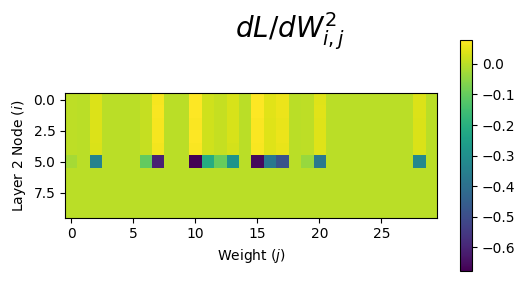

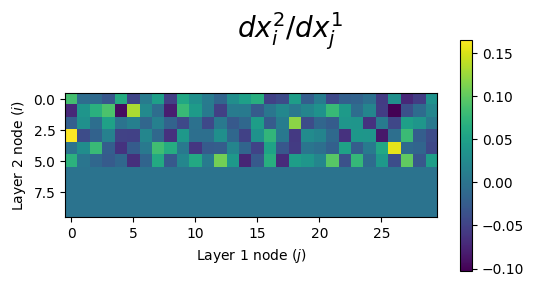

In [83]:
idx = 0
y = np.zeros(10)
y[train_labels[idx]] = 1
obs = train_images[idx,:,:].flatten()/255.

dLdW2 = dL_dW2(network,obs,y)
plt.figure(figsize=(6,3))
plt.suptitle('$dL / dW^2_{i,j}$', fontsize=20)
plt.imshow(dLdW2);
plt.xlabel('Weight ($j$)')
plt.ylabel('Layer 2 Node ($i$)')
plt.colorbar(orientation='vertical');

dx2dx1 = dx2_dx1(network,obs,y)
plt.figure(figsize=(6,3))
plt.suptitle('$dx_i^2 / dx_j^1$', fontsize=20)
plt.imshow(dx2dx1);
plt.xlabel('Layer 1 node ($j$)')
plt.ylabel('Layer 2 node ($i$)')
plt.colorbar(orientation='vertical');

dLdb2 = dL_db2(network,obs,y)
print('Derivative of L with respet to the biases in the second layer: '+str(dLdb2))

### STEP 2:  Compute formulas for the derivatives of the Loss function with respect to the parameters in the first layer, $W^1_{i,j}$ and $b^1_i$ for $i \in \{0,...,30\}$ and $j \in \{0,...,784\}$.

Similar to the second layer:

The output of the $i$-th node in the first layer is
\begin{equation}
x^1_i = ReLU\left( b^1_i + \sum_{j=1}^{30}W^1_{i,j}x_j \right) =
\begin{cases} 
      0 & \textrm{if} & b^1_i + \sum_{j=1}^{30}W^1_{i,j}x_j < 0 \\
      b^1_i + \sum_{j=1}^{30}W^1_{i,j}x_j & \textrm{if} & b^1_i + \sum_{j=1}^{30}W^1_{i,j}x_j > 0 
\end{cases}
\end{equation}

The derivative of the output of the $i$-th node of layer 1 with respect to the weights of the first layer is:
\begin{equation}
\frac{d x^1_i}{dW^1_{i,j}} =
\begin{cases} 
      0 & \textrm{if} & x^1_i = 0 \\
      x_j & \textrm{if} & x^1_i > 0 
\end{cases} 
\end{equation}
and the derivative of the output of the $i$-th node of layer 2 with respect to the associated bias is:
\begin{equation}
\frac{d x^1_i}{db^1_i} =
\begin{cases} 
      0 & \textrm{if} & x^1_i = 0 \\
      1 & \textrm{if} & x^1_i > 0 
\end{cases} 
\end{equation}

NOTE:  Note that he derivatives of the ReLU function are very simple.  This is one of the reasons we might choose this function, or a different function with similarly simple derivatives.

From the chain rule,
\begin{equation}
\frac{dL(y,\hat{y})}{dW^1_{i,j}} = \sum_{k=0}^9 \frac{d L(y,\hat{y})}{d x^2_k}\frac{d x^2_k}{d x^1_i}\frac{d x^1_i}{dW^1_{i,j}} 
\end{equation}

From our previous work, the functions for the three derivatives in the chain rule are:

\begin{equation}
\frac{d L(y,\hat{y})}{d x^2_k} = \hat{y}_k - y_k
\end{equation}

\begin{equation}
\frac{d x^2_k}{dx^1_i} =
\begin{cases} 
      0 & \textrm{if} & x^2_k = 0 \\
      W^2_{k,i} & \textrm{if} & x^2_k > 0 
\end{cases} 
\end{equation}

\begin{equation}
\frac{d x^1_i}{dW^1_{i,j}} =
\begin{cases} 
      0 & \textrm{if} & x^1_i = 0 \\
      x_j & \textrm{if} & x^1_i > 0 
\end{cases} 
\end{equation}

Multiplying these gives:

\begin{equation}
\frac{dL(y,\hat{y})}{dW^1_{i,j}}  =  \sum_{k=0}^9 
\begin{cases} 
      0 & \textrm{if } x^2_k = 0 \textrm{ or } x^1_i = 0\\
      (\hat{y}_k - y_k) W^2_{k,i} x_j & \textrm{otherwise}
\end{cases} 
\end{equation}

In [84]:
def dL_dW1(network,obs,y):
  # the part in paranthesis (y1\hat{y1},...,ym\hat{ym})is dL_dx2:
  dLdx2 = dL_dx2(network,obs,y)
  numx2i = network.layer2.numNodes 
  numx1i = network.layer1.numNodes 
  numInputs = network.layer1.numInputs
  # define the variable to hold the output 
  # this is an array the same size as the weight matrix
  dLdW1 = np.zeros((numx1i,numInputs))
  for i in range(numx1i):
    for k in range(numx2i):
      if not (network.out2[k] == 0) or (network.out1[i] == 0):
        for j in range(numInputs):
          dLdW1[i,j] = dLdW1[i,j] + dLdx2[k]*network.layer2.weights[k,i]*obs[j]
  return dLdW1

Similar to the previous derivation: from the chain rule,
\begin{equation}
\frac{dL(y,\hat{y})}{db^1_{i}} = \sum_{k=0}^9 \frac{d L(y,\hat{y})}{d x^2_k}\frac{d x^2_k}{d x^1_i}\frac{d x^1_i}{b^1_{i}} 
\end{equation}

From our previous work, the functions for the three derivatives in the chain rule are:

\begin{equation}
\frac{d L(y,\hat{y})}{d x^2_k} = \hat{y}_k - y_k
\end{equation}

\begin{equation}
\frac{d x^2_k}{dx^1_i} =
\begin{cases} 
      0 & \textrm{if} & x^2_k = 0 \\
      W^2_{k,i} & \textrm{if} & x^2_k > 0 
\end{cases} 
\end{equation}

\begin{equation}
\frac{d x^1_i}{db^1_{i}} =
\begin{cases} 
      0 & \textrm{if} & x^1_i = 0 \\
      1 & \textrm{if} & x^1_i > 0 
\end{cases} 
\end{equation}

Multiplying these gives:

\begin{equation}
\frac{dL(y,\hat{y})}{db^1_{i}}  =  \sum_{k=0}^9 
\begin{cases} 
      0 & \textrm{if } x^2_k = 0 \textrm{ or } x^1_i = 0\\
      (\hat{y}_k - y_k) W^2_{k,i} & \textrm{otherwise}
\end{cases} 
\end{equation}

In [85]:
def dL_db1(network,obs,y):
  # the part in paranthesis (y1\hat{y1},...,ym\hat{ym})is dL_dx2:
  dLdx2 = dL_dx2(network,obs,y)
  numx2i = network.layer2.numNodes 
  numx1i = network.layer1.numNodes 
  numInputs = network.layer1.numInputs
  # define the variable to hold the output 
  # this is an array the same size as the weight matrix
  dLdb1 = np.zeros((numx1i))
  for i in range(numx1i):
    for k in range(numx2i):
      if not (network.out2[k] == 0) or (network.out1[i] == 0):
        dLdb1[i] = dLdb1[i] + dLdx2[k]*network.layer2.weights[k,i]
  return dLdb1

### STEP 2:  Create a method for the network that will use the derivatives to adjust the weights.

In [86]:
# define the network (this time using the )
class network2layers():
  
  def __init__(self, layer1, layer2, layerFinal):
    self.layer1 = layer1
    self.layer2 = layer2
    self.layerFinal = layerFinal
  
  def apply(self, inputs):
    self.inputs = inputs
    # This determines the network 'architecture'
    self.out1 = self.layer1.apply(self.inputs)
    self.out2 = self.layer2.apply(self.out1)
    self.outFinal = self.layerFinal(self.out2)
    return self.outFinal

  def train(self, obs, y, alpha):
    #   obs = one observation (input into the network)
    #   y = the truth value for the obs
    #   alpha = the training rate
    self.layer1.weights = self.layer1.weights - alpha*dL_dW1(network,obs,y)
    self.layer1.biases = self.layer1.biases - alpha*dL_db1(network,obs,y)
    self.layer2.weights = self.layer2.weights - alpha*dL_dW2(network,obs,y)
    self.layer2.biases = self.layer2.biases - alpha*dL_db2(network,obs,y)
    #print(dL_dW2(network,obs,y))

# create an instance of this network 
# (the weights will be randomly selected since it is not trained)
network = network2layers(layer1, layer2, layerFinal)

Rounds of training:

In [87]:
# make a list to hold the loss as we train
L = []

In [88]:
probability_training_single = 0
num_iters = 100
probability_training = np.zeros(int(num_iters/20))
for i in range(num_iters):
  idx = random.randrange(num_train_images)
  y = np.zeros(10)
  y[train_labels[idx]] = 1
  obs = train_images[idx,:,:].flatten()/255.  
  network.train(obs, y, 0.0001)
  
  idx = random.randrange(num_test_images)
  y = np.zeros(10)
  y[test_labels[idx]] = 1
  obs = test_images[idx,:,:].flatten()/255.  
  yhat = network.apply(obs)
  L.append(Loss(y,yhat))
  probability_training_single = probability_training_single + yhat[test_labels[idx]]
  if (i % 20) == 0:
    print('Completed '+str(i)+' of '+str(num_iters))
    print('Truth: '+str(test_labels[idx])+' | Predicted Prob: '+str(yhat[test_labels[idx]]))
    print('Average Probability on Truth Class: '+str(probability_training_single/20)+' (above 0.1 is good, close to 1 is best) ')
    probability_training[int(i/20)] = probability_training_single/20
    probability_training_single = 0

Completed 0 of 100
Truth: 6 | Predicted Prob: 0.10306092220811829
Average Probability on Truth Class: 0.005153046110405914 (above 0.1 is good, close to 1 is best) 
Completed 20 of 100
Truth: 1 | Predicted Prob: 0.09861589888664976
Average Probability on Truth Class: 0.09934113890039234 (above 0.1 is good, close to 1 is best) 
Completed 40 of 100
Truth: 6 | Predicted Prob: 0.09704744828441161
Average Probability on Truth Class: 0.09768793557649323 (above 0.1 is good, close to 1 is best) 
Completed 60 of 100
Truth: 9 | Predicted Prob: 0.0969644923976265
Average Probability on Truth Class: 0.09907035618201107 (above 0.1 is good, close to 1 is best) 
Completed 80 of 100
Truth: 8 | Predicted Prob: 0.0961014483113627
Average Probability on Truth Class: 0.09924742891203983 (above 0.1 is good, close to 1 is best) 


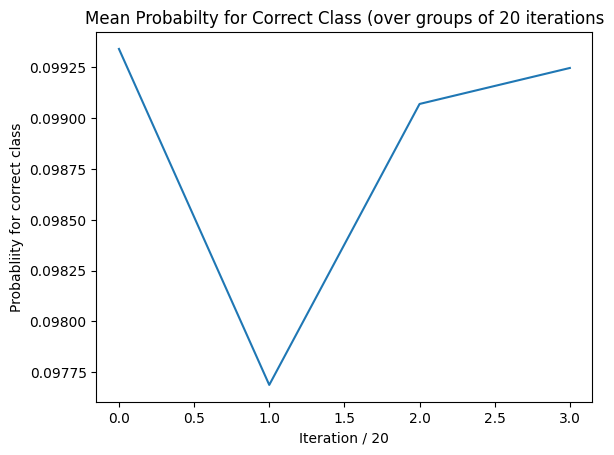

In [89]:
plt.plot(probability_training[1:])
plt.xlabel('Iteration / 20')
plt.ylabel('Probabliity for correct class')
plt.title('Mean Probabilty for Correct Class (over groups of 20 iterations');

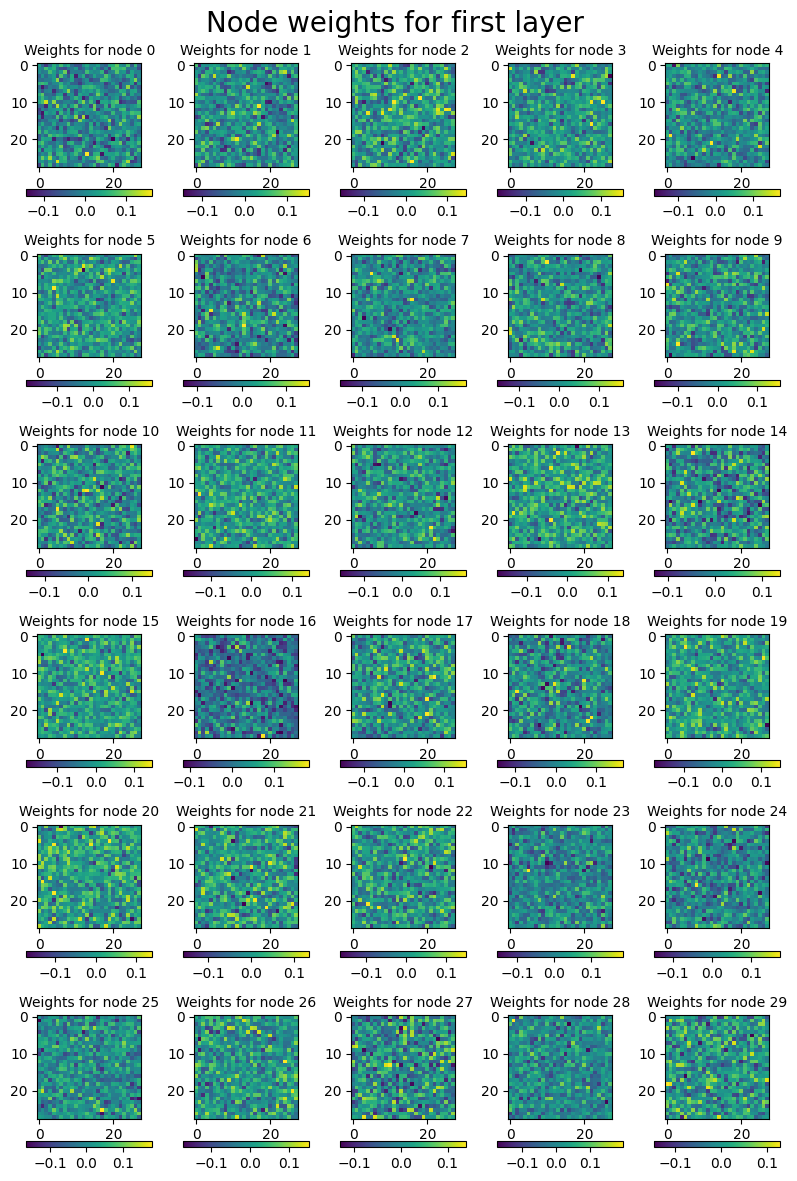

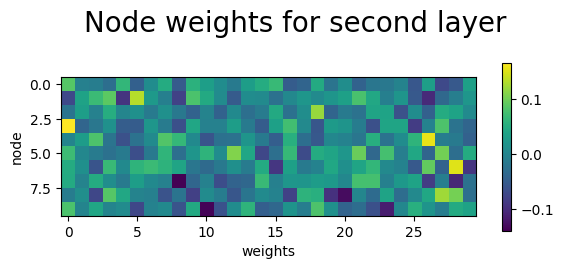

In [90]:
NNview(network.layer1, title='Node weights for first layer')
NNview(network.layer2, title='Node weights for second layer')

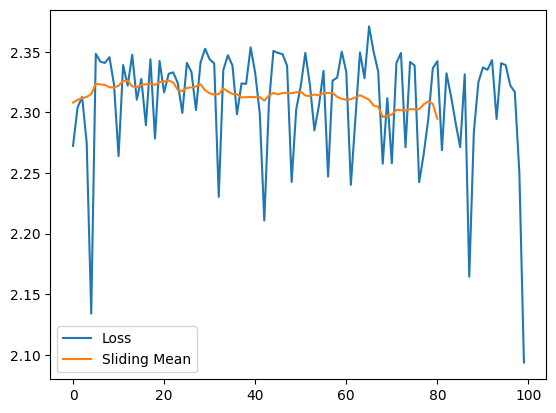

In [91]:
N = 20
plt.plot(L, label='Loss')
plt.plot(np.convolve(L, np.ones(N)/N, mode='valid'), label='Sliding Mean')
plt.legend()

Accuracy: 0.131


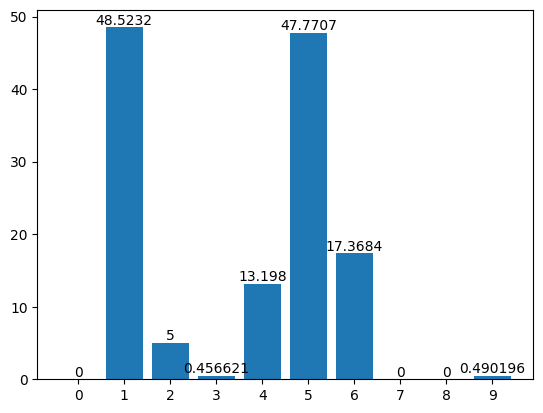

In [92]:
NumCorrect = np.zeros(10)
Num = np.zeros(10)

for idx in range(2000):
  idx = random.randrange(num_test_images)
  y = np.zeros(10)
  y[test_labels[idx]] = 1
  obs = test_images[idx,:,:].flatten()/255.  
  yhat = network.apply(obs)
  Num[test_labels[idx]] = Num[test_labels[idx]] + 1
  if (test_labels[idx] == np.argmax(yhat)):
    NumCorrect[test_labels[idx]] = NumCorrect[test_labels[idx]] + 1

print('Accuracy: '+str(np.sum(NumCorrect)/np.sum(Num)))
accuracy = NumCorrect/Num
bars = plt.bar(['0','1','2','3','4','5','6','7','8','9'], accuracy*100)
plt.bar_label(bars);

# Add MiniBatch Training

In [93]:
# define the network (this time using the )
class network2layers():
  
  def __init__(self, layer1, layer2, layerFinal):
    self.layer1 = layer1
    self.layer2 = layer2
    self.layerFinal = layerFinal
  
  def apply(self, inputs):
    self.inputs = inputs
    # This determines the network 'architecture'
    self.out1 = self.layer1.apply(self.inputs)
    self.out2 = self.layer2.apply(self.out1)
    self.outFinal = self.layerFinal(self.out2)
    return self.outFinal

  def train(self, obs, y, alpha):
    #   obs = one observation (input into the network)
    #   y = the truth value for the obs
    #   alpha = the training rate
    self.layer1.weights = self.layer1.weights - alpha*dL_dW1(network,obs,y)
    self.layer1.biases = self.layer1.biases - alpha*dL_db1(network,obs,y)
    self.layer2.weights = self.layer2.weights - alpha*dL_dW2(network,obs,y)
    self.layer2.biases = self.layer2.biases - alpha*dL_db2(network,obs,y)
  
  def trainMiniBatch(self, obs_list, y_list, alpha):
    self.batch_size = len(y_list)
    deltaL_dW1 = 0
    deltaL_db1 = 0
    deltaL_dW2 = 0
    deltaL_db2 = 0
    for i in range(self.batch_size):
      y = y_list[i]
      obs = obs_list[i]
      deltaL_dW1 = deltaL_dW1 + dL_dW1(network,obs,y)
      deltaL_db1 = deltaL_db1 + dL_db1(network,obs,y)
      deltaL_dW2 = deltaL_dW2 + dL_dW2(network,obs,y)
      deltaL_db2 = deltaL_db2 + dL_db2(network,obs,y)
      #print(dL_dW1(network,obs,y))
    self.layer1.weights = self.layer1.weights -  alpha*deltaL_dW1/self.batch_size
    self.layer1.biases = self.layer1.biases - alpha*deltaL_db1/self.batch_size
    self.layer2.weights = self.layer2.weights - alpha*deltaL_dW2/self.batch_size
    self.layer2.biases = self.layer2.biases - alpha*deltaL_db2/self.batch_size
    #print(deltaL_dW1)
    #print(deltaL_db1)
    #print(deltaL_dW2)
    #print(deltaL_db2)

# create an instance of this network 
# (the weights will be randomly selected since it is not trained)
network = network2layers(layer1, layer2, layerFinal)

In [94]:
# make a list to hold the loss as we train
L = []

In [57]:
num_iters = 20
batch_size = 20
for i in range(num_iters):
  batch_idx = np.random.randint(0, high=num_train_images, size=batch_size)
  y_list = []
  obs_list = []
  for idx in batch_idx:
    y = np.zeros(10)
    y[train_labels[idx]] = 1
    y_list.append(y)
    obs = train_images[idx,:,:].flatten()/255.  
    obs_list.append(obs)
  network.trainMiniBatch(obs_list, y_list, 1)
  
  idx = random.randrange(num_test_images)
  y = np.zeros(10)
  y[test_labels[idx]] = 1
  obs = test_images[idx,:,:].flatten()/255.  
  yhat = network.apply(obs)
  L.append(Loss(y,yhat))
  print('Completed '+str(i)+' of '+str(num_iters), end = '')
  print(' -- Truth: '+str(test_labels[idx])+' | Predicted Prob: '+str(yhat[test_labels[idx]]))

Completed 0 of 20 -- Truth: 1 | Predicted Prob: 0.11666375060237297
Completed 1 of 20 -- Truth: 5 | Predicted Prob: 0.11482879262029605
Completed 2 of 20 -- Truth: 1 | Predicted Prob: 0.12399093360205012
Completed 3 of 20 -- Truth: 9 | Predicted Prob: 0.0885638595640375
Completed 4 of 20 -- Truth: 9 | Predicted Prob: 0.06552751434532385
Completed 5 of 20 -- Truth: 9 | Predicted Prob: 0.07651113772442704
Completed 6 of 20 -- Truth: 5 | Predicted Prob: 0.0697566980401681
Completed 7 of 20 -- Truth: 9 | Predicted Prob: 0.08104470852992256
Completed 8 of 20 -- Truth: 3 | Predicted Prob: 0.08715771679206959
Completed 9 of 20 -- Truth: 8 | Predicted Prob: 0.09379704780592515
Completed 10 of 20 -- Truth: 5 | Predicted Prob: 0.1403661006854762
Completed 11 of 20 -- Truth: 5 | Predicted Prob: 0.09370306006065986
Completed 12 of 20 -- Truth: 8 | Predicted Prob: 0.09389544588539132
Completed 13 of 20 -- Truth: 1 | Predicted Prob: 0.6736362002748325
Completed 14 of 20 -- Truth: 7 | Predicted Prob:

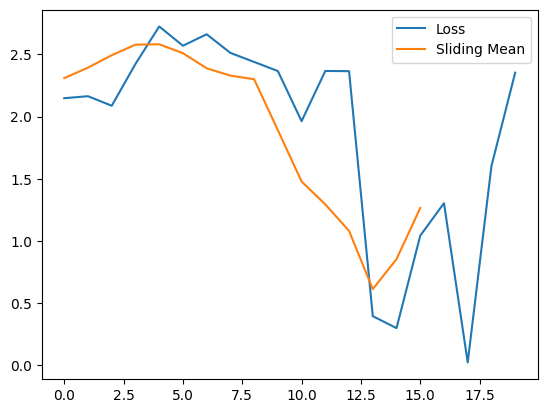

In [58]:
N = 5
plt.plot(L, label='Loss')
plt.plot(np.convolve(L, np.ones(N)/N, mode='valid'), label='Sliding Mean')
plt.legend()

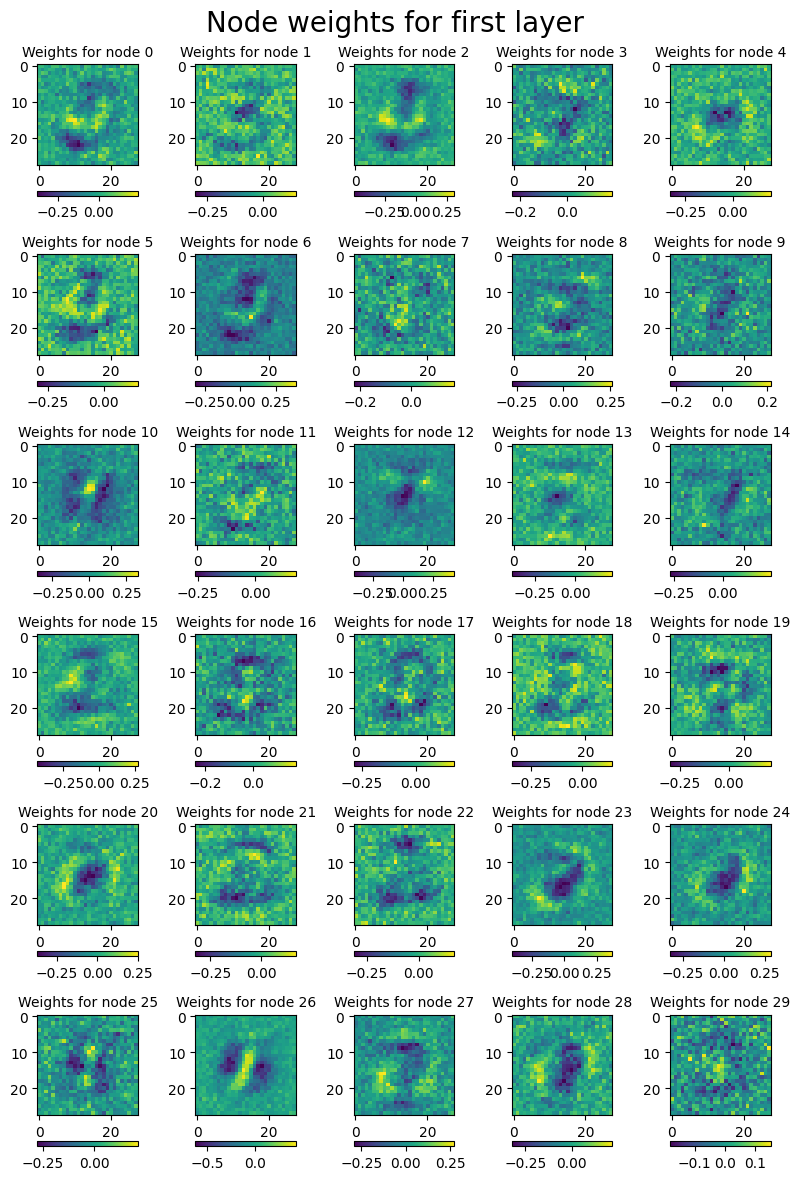

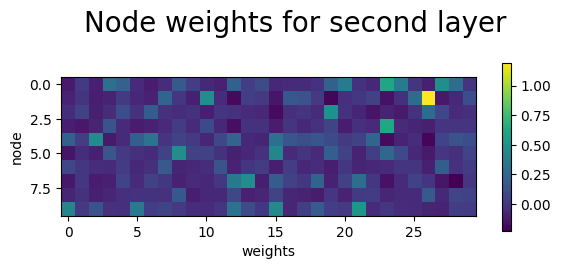

In [59]:
NNview(network.layer1, title='Node weights for first layer')
plt.savefig('20k_iterations_node_weights1.png')
NNview(network.layer2, title='Node weights for second layer')
plt.savefig('20k_iterations_node_weights2.png')

Accuracy: 0.3195


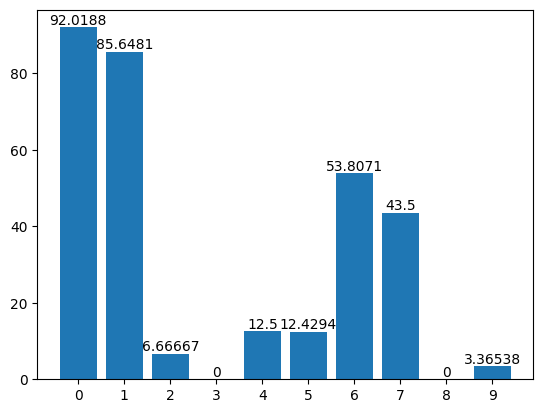

In [60]:
NumCorrect = np.zeros(10)
Num = np.zeros(10)

for idx in range(2000):
  idx = random.randrange(num_test_images)
  y = np.zeros(10)
  y[test_labels[idx]] = 1
  obs = test_images[idx,:,:].flatten()/255.  
  yhat = network.apply(obs)
  Num[test_labels[idx]] = Num[test_labels[idx]] + 1
  if (test_labels[idx] == np.argmax(yhat)):
    NumCorrect[test_labels[idx]] = NumCorrect[test_labels[idx]] + 1

print('Accuracy: '+str(np.sum(NumCorrect)/np.sum(Num)))
accuracy = NumCorrect/Num
bars = plt.bar(['0','1','2','3','4','5','6','7','8','9'], accuracy*100)
plt.bar_label(bars);

# Regularization

In [103]:
# define the network (this time using the )
class network2layers():
  
  def __init__(self, layer1, layer2, layerFinal):
    self.layer1 = layer1
    self.layer2 = layer2
    self.layerFinal = layerFinal
  
  def apply(self, inputs):
    self.inputs = inputs
    # This determines the network 'architecture'
    self.out1 = self.layer1.apply(self.inputs)
    self.out2 = self.layer2.apply(self.out1)
    self.outFinal = self.layerFinal(self.out2)
    return self.outFinal

  def train(self, obs, y, alpha):
    #   obs = one observation (input into the network)
    #   y = the truth value for the obs
    #   alpha = the training rate
    self.layer1.weights = self.layer1.weights - alpha*dL_dW1(network,obs,y)
    self.layer1.biases = self.layer1.biases - alpha*dL_db1(network,obs,y)
    self.layer2.weights = self.layer2.weights - alpha*dL_dW2(network,obs,y)
    self.layer2.biases = self.layer2.biases - alpha*dL_db2(network,obs,y)
  
  def trainMiniBatch(self, obs_list, y_list, alpha, w_decay):
    self.batch_size = len(y_list)
    deltaL_dW1 = 0
    deltaL_db1 = 0
    deltaL_dW2 = 0
    deltaL_db2 = 0
    for i in range(self.batch_size):
      y = y_list[i]
      obs = obs_list[i]
      deltaL_dW1 = deltaL_dW1 + dL_dW1(network,obs,y)
      deltaL_db1 = deltaL_db1 + dL_db1(network,obs,y)
      deltaL_dW2 = deltaL_dW2 + dL_dW2(network,obs,y)
      deltaL_db2 = deltaL_db2 + dL_db2(network,obs,y)
      #print(dL_dW1(network,obs,y))
    self.layer1.weights = self.layer1.weights - alpha*(w_decay*np.abs(self.layer1.weights) + deltaL_dW1/self.batch_size)
    self.layer1.biases = self.layer1.biases - alpha*(w_decay*np.abs(self.layer1.biases) + deltaL_db1/self.batch_size)
    self.layer2.weights = self.layer2.weights - alpha*(w_decay*np.abs(self.layer2.weights) + deltaL_dW2/self.batch_size)
    self.layer2.biases = self.layer2.biases - alpha*(w_decay*np.abs(self.layer2.biases) + deltaL_db2/self.batch_size)
    #print(deltaL_dW1)
    #print(deltaL_db1)
    #print(deltaL_dW2)
    #print(deltaL_db2)

# create an instance of this network 
# (the weights will be randomly selected since it is not trained)
network = network2layers(layer1, layer2, layerFinal)

In [62]:
L = []

In [112]:
num_iters = 200
batch_size = 20
for i in range(num_iters):
  batch_idx = np.random.randint(0, high=num_train_images, size=batch_size)
  y_list = []
  obs_list = []
  for idx in batch_idx:
    y = np.zeros(10)
    y[train_labels[idx]] = 1
    y_list.append(y)
    obs = train_images[idx,:,:].flatten()/255.  
    obs_list.append(obs)
  network.trainMiniBatch(obs_list, y_list, 1, 0.01)
  
  idx = random.randrange(num_test_images)
  y = np.zeros(10)
  y[test_labels[idx]] = 1
  obs = test_images[idx,:,:].flatten()/255.  
  yhat = network.apply(obs)
  L.append(Loss(y,yhat))
  print('Completed '+str(i)+' of '+str(num_iters), end = '')
  print(' -- Truth: '+str(test_labels[idx])+' | Predicted Prob: '+str(yhat[test_labels[idx]]))

Completed 0 of 200 -- Truth: 6 | Predicted Prob: 0.2673659388917494
Completed 1 of 200 -- Truth: 8 | Predicted Prob: 0.09207244355829529
Completed 2 of 200 -- Truth: 0 | Predicted Prob: 0.9999959280351565
Completed 3 of 200 -- Truth: 6 | Predicted Prob: 0.09256249710471638
Completed 4 of 200 -- Truth: 4 | Predicted Prob: 0.11191382870774763
Completed 5 of 200 -- Truth: 6 | Predicted Prob: 0.9999730006912668
Completed 6 of 200 -- Truth: 0 | Predicted Prob: 0.09265128208988431
Completed 7 of 200 -- Truth: 7 | Predicted Prob: 0.135253529423996
Completed 8 of 200 -- Truth: 0 | Predicted Prob: 0.5749652101187731
Completed 9 of 200 -- Truth: 9 | Predicted Prob: 0.12147210684975643
Completed 10 of 200 -- Truth: 0 | Predicted Prob: 0.09367973112899662
Completed 11 of 200 -- Truth: 2 | Predicted Prob: 0.09473926233981352
Completed 12 of 200 -- Truth: 7 | Predicted Prob: 0.1125532470044434
Completed 13 of 200 -- Truth: 3 | Predicted Prob: 0.10025003172994232
Completed 14 of 200 -- Truth: 5 | Pre

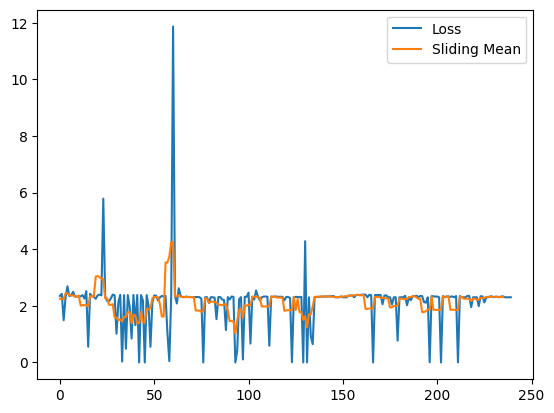

In [113]:
N = 5
plt.plot(L, label='Loss')
plt.plot(np.convolve(L, np.ones(N)/N, mode='valid'), label='Sliding Mean')
plt.legend()

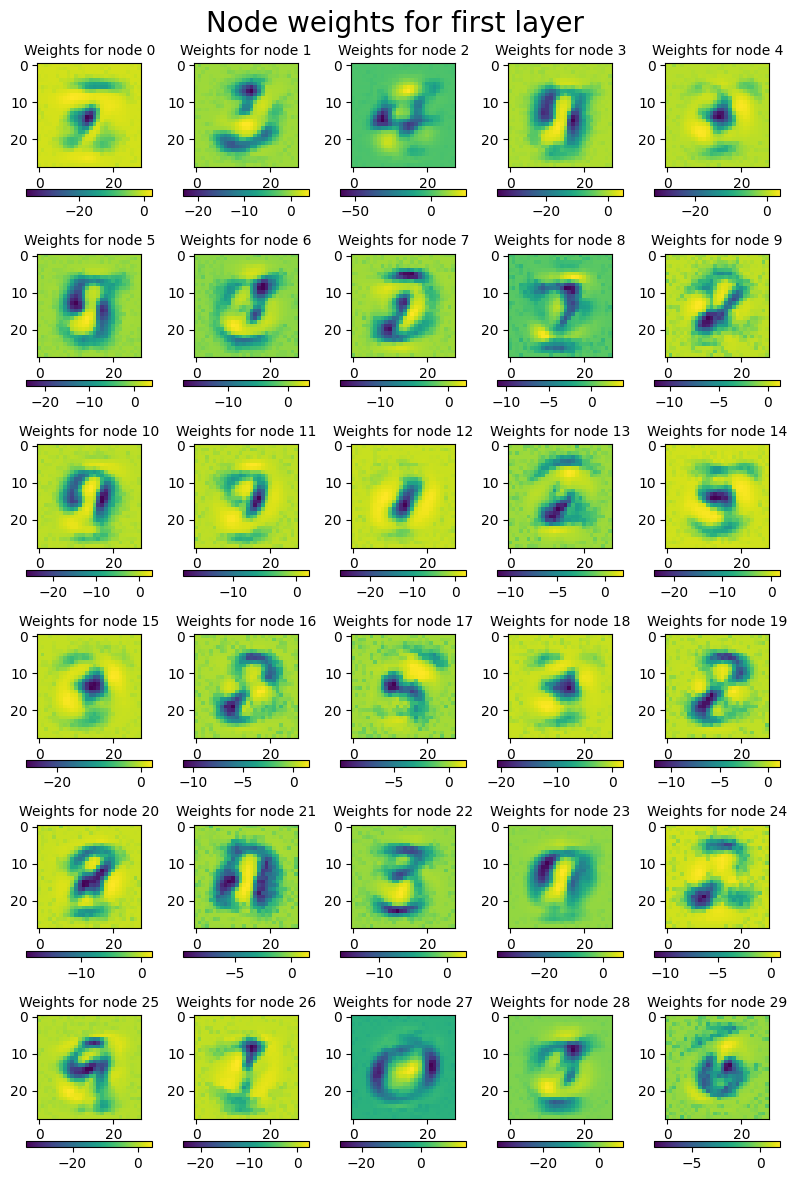

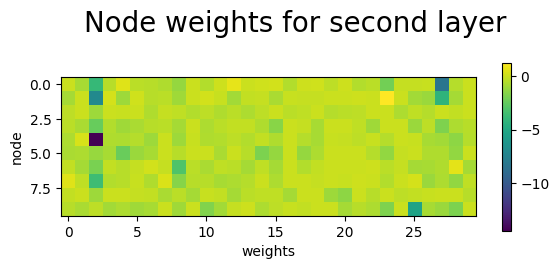

In [114]:
NNview(network.layer1, title='Node weights for first layer')
plt.savefig('20k_iterations_node_weights1.png')
NNview(network.layer2, title='Node weights for second layer')
plt.savefig('20k_iterations_node_weights2.png')

Accuracy: 0.097


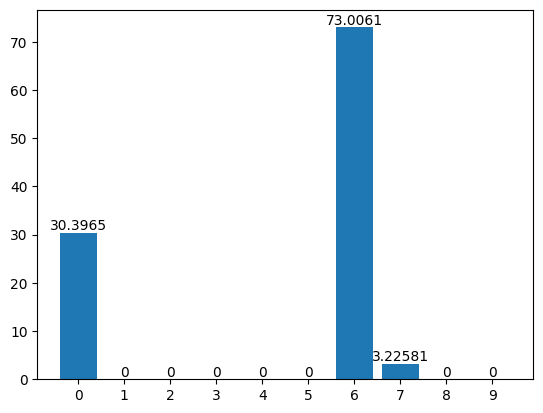

In [115]:
NumCorrect = np.zeros(10)
Num = np.zeros(10)

for idx in range(2000):
  idx = random.randrange(num_test_images)
  y = np.zeros(10)
  y[test_labels[idx]] = 1
  obs = test_images[idx,:,:].flatten()/255.  
  yhat = network.apply(obs)
  Num[test_labels[idx]] = Num[test_labels[idx]] + 1
  if (test_labels[idx] == np.argmax(yhat)):
    NumCorrect[test_labels[idx]] = NumCorrect[test_labels[idx]] + 1

print('Accuracy: '+str(np.sum(NumCorrect)/np.sum(Num)))
accuracy = NumCorrect/Num
bars = plt.bar(['0','1','2','3','4','5','6','7','8','9'], accuracy*100)
plt.bar_label(bars);